In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from math import sqrt

# Центральная предельная теорема

Сгенерируем выборку объёма 1000 из Гамма-распределения (с $k=2$ и $\theta=1$):

In [26]:
gamma_rv = sts.gamma(2)
sample = gamma_rv.rvs(1000)

По данной выборке построим гистограмму и нарисуем поверх неё теоретическую плотность Гамма-распределения:

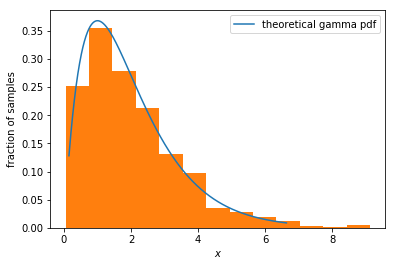

In [27]:
x = np.linspace(sts.gamma.ppf(0.01, 2), sts.gamma.ppf(0.99, 2), 1000)
plt.plot(x, sts.gamma.pdf(x, 2), label="theoretical gamma pdf")
plt.hist(sample, bins = 13, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

Напишем функцию, принимающую на вход натуральное значение n, которая сгенерирует 1000 выборок объёма n и построит гистограмму распределений их выборочных средних. Затем она должна посчитать значения параметров нормальных распределений, которыми, согласно ЦПТ, приближается распределение выборочных средних. Поверх каждой гистограммы отрисована плотность соответствующего нормального распределения.

In [69]:
def gammaCLT(n):
    gamma_rvs_means = np.array([sts.gamma(2).rvs(size=n) for x in range(1000)]).mean(axis=1)
    plt.hist(gamma_rvs_means, normed=True, bins=15, label="Means of samples length " + str(n))
    
    mu = sts.gamma(2).mean()
    std = sts.gamma(2).std()
    variance = (sts.gamma(2).std())**2
    print("Вывод теоретических значений выборки.")
    print("Среднее: " + str(mu))
    print("Дисперсия: " + str(variance))
    print("Корень из дисперсии: " + str(std))
    print()
    print("По ЦПТ вычислим значение сигмы приближающего нормального распределения.")
    sigma = std / sqrt(n)
    print("Сигма: " + str(sigma))

    norm_rv = sts.norm(mu, sigma)
    x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 100)
    plt.plot(x, norm_rv.pdf(x), 'r-', label="PDF of norm sample length " + str(n))
    plt.legend(loc="best")
    plt.ylabel("samples")
    plt.xlabel('$x$')

Вызовем функцию для размера выборки 5:

Вывод теоретических значений выборки.
Среднее: 2.0
Дисперсия: 2.0000000000000004
Корень из дисперсии: 1.4142135623730951

По ЦПТ вычислим значение сигмы приближающего нормального распределения.
Сигма: 0.6324555320336759


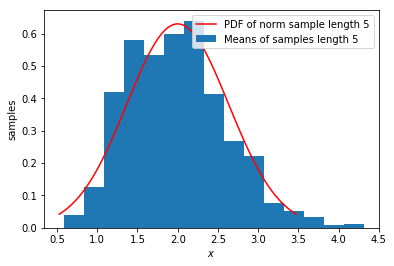

In [73]:
gammaCLT(5)

Вызовем функцию для размера выборки 10:

Вывод теоретических значений выборки.
Среднее: 2.0
Дисперсия: 2.0000000000000004
Корень из дисперсии: 1.4142135623730951

По ЦПТ вычислим значение сигмы приближающего нормального распределения.
Сигма: 0.4472135954999579


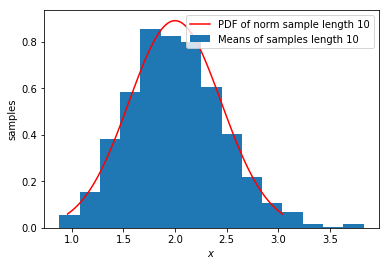

In [74]:
gammaCLT(10)

Вызовем функцию для размера выборки 50:

Вывод теоретических значений выборки.
Среднее: 2.0
Дисперсия: 2.0000000000000004
Корень из дисперсии: 1.4142135623730951

По ЦПТ вычислим значение сигмы приближающего нормального распределения.
Сигма: 0.2


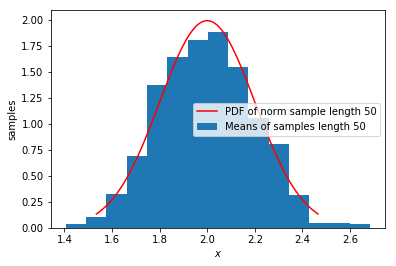

In [75]:
gammaCLT(50)

Вызовем функцию для размера выборки 200:

Вывод теоретических значений выборки.
Среднее: 2.0
Дисперсия: 2.0000000000000004
Корень из дисперсии: 1.4142135623730951

По ЦПТ вычислим значение сигмы приближающего нормального распределения.
Сигма: 0.1


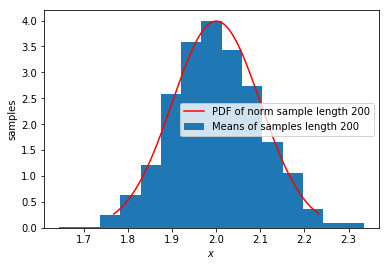

In [77]:
gammaCLT(200)

## Вывод

ЦПТ работает для данного распределения, то есть распределение выборочных средних из выборок Гамма-распределения может быть приближено с помощью нормального распределения.
При этом с ростом n точность аппроксимации увеличивается.